In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Import data and normalize

#data = pd.read_csv("drive/My Drive/H2O_Super.csv")[1:]
data = pd.read_csv("drive/My Drive/Colab Notebooks/Final Project/H2O_Super.csv")[1:]

X_train, X_test, y_train, y_test = train_test_split(data.values[:, 0:2], data.values[:, 2:6], train_size=0.8, random_state=1)

X_train, X_test, y_train, y_test = X_train.astype(float), X_test.astype(float), y_train.astype(float), y_test.astype(float)

X_mean = np.mean(X_train, 0)
X_std = np.std(X_train, 0)
y_mean = np.mean(y_train, 0)
y_std = np.std(y_train, 0)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

# Divide the data into 75% training and 25% validation data sets
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=1)



# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
#print('Val  : X=%s, y=%s' % (X_val.shape, y_val.shape)) # val data is passed into the model from 30% of training data
print('Test : X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(1306, 2), y=(1306, 4)
Test : X=(327, 2), y=(327, 4)


In [ ]:
# Changing these around gives interesting results in the deviance plot below
# results below are most optimal
max_depth = 1
n_estimators = 10
validation_fraction = 0.3
verbose = 0
learning_rate = 0.9

skmodel = MultiOutputRegressor(GradientBoostingRegressor(random_state=6,
                                                         max_depth = max_depth,
                                                         verbose=verbose,
                                                         validation_fraction = validation_fraction,
                                                         n_estimators=n_estimators,
                                                         learning_rate = learning_rate
                                                         )
                              ).fit(X_train, y_train)

In [ ]:
# Visualize the trees in the emsemble


total_param = 0

for tree in skmodel.estimators_[0].estimators_:
  plt.figure((20,20))
  plot_tree(tree[0])
  total_param += (2 * tree[0].get_n_leaves() - 1) * 2

plt.show()
print(total_param)

TypeError: ignored

In [ ]:
# perform 10 fold cross validation

cross_val_score(skmodel,X_test,y_test,cv=10) 

array([0.8978533 , 0.90139116, 0.80189279, 0.91327422, 0.76942177,
       0.85302092, 0.84605014, 0.83303168, 0.8973035 , 0.85904348])

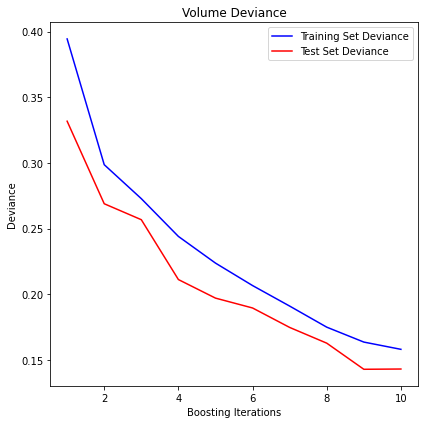

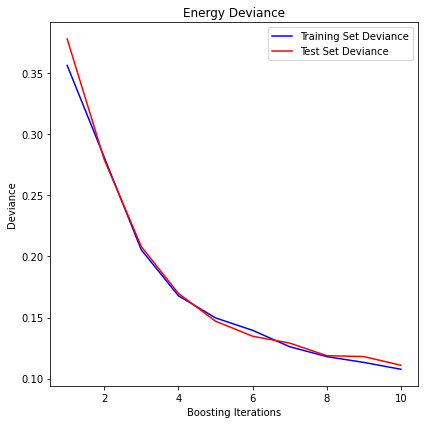

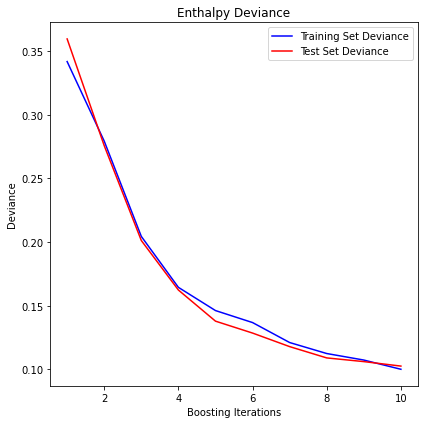

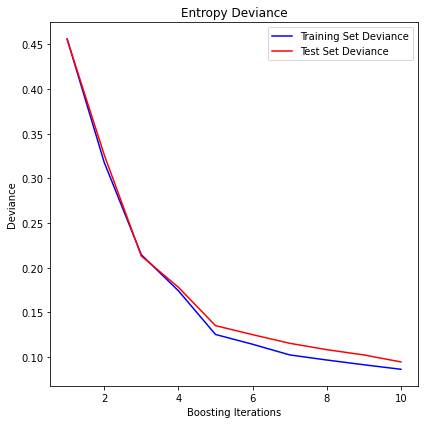

In [ ]:
labels = ['Volume','Energy','Enthalpy','Entropy']
for j in range(4):
  reg = skmodel.estimators_[j]

  params = reg.get_params()
  test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
  for i, y_pred in enumerate(reg.staged_predict(X_test)):
      test_score[i] = reg.loss_(y_test[:,j], y_pred)

  fig = plt.figure(figsize=(6, 6))
  plt.subplot(1, 1, 1)
  plt.title(labels[j]+" Deviance")
  plt.plot(
      np.arange(params["n_estimators"]) + 1,
      reg.train_score_,
      "b-",
      label="Training Set Deviance",
  )
  plt.plot(
      np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
  )
  plt.legend(loc="upper right")
  plt.xlabel("Boosting Iterations")
  plt.ylabel("Deviance")
  fig.tight_layout()
  plt.show()

In [ ]:
y_pred = skmodel.predict(X_test)

vol_error = y_test[:,0] - y_pred[:,0]
vol_SSE = np.sum(vol_error ** 2)

energy_error = y_test[:,1] - y_pred[:,1]
energy_SSE = np.sum(energy_error ** 2)

enth_error = y_test[:,2] - y_pred[:,2]
enth_SSE = np.sum(enth_error ** 2)

entr_error = y_test[:,3] - y_pred[:,3]
entr_SSE = np.sum(entr_error ** 2)

print('Volume SSE: {:.4f}'.format(vol_SSE))
print('Energy SSE: {:.4f}'.format(energy_SSE))
print('Enthalpy SSE: {:.4f}'.format(enth_SSE))
print('Entropy SSE: {:.4f}'.format(entr_SSE))
print('Total SSE: {:.4f}'.format(vol_SSE + energy_SSE + enth_SSE + entr_SSE))
print("Model Accuracy: {:.4f}".format(skmodel.score(X_test, y_test)))

Volume SSE: 3.6855
Energy SSE: 8.4617
Enthalpy SSE: 8.2266
Entropy SSE: 13.6606
Model Accuracy: 0.9735


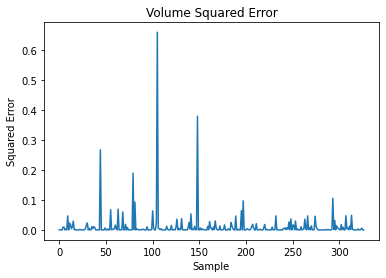

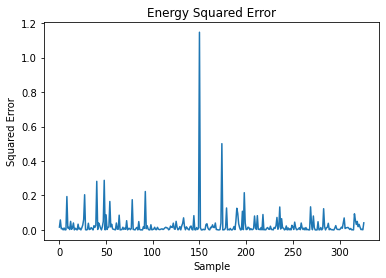

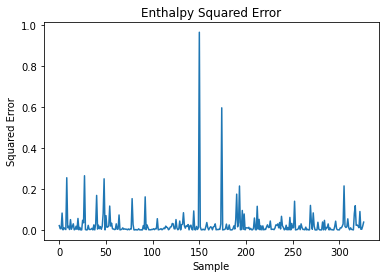

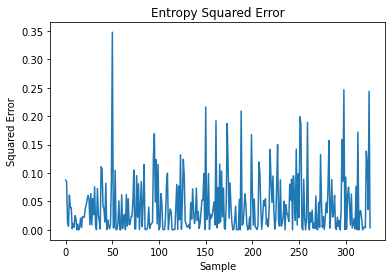

In [ ]:
y_count = np.arange(0,len(y_pred),1)
y_errors = [vol_error,energy_error,enth_error,entr_error]

for i in range(len(y_errors)):
  plt.plot(y_count,y_errors[i]**2)
  plt.title(labels[i] + ' Squared Error')
  plt.ylabel('Squared Error')
  plt.xlabel('Sample')
  plt.show()

In [ ]:
  reg = skmodel.estimators_[0]

  params = reg.get_params()

In [ ]:
params.keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])